# Prototipo de prompting para comprender el uso de LLM's y su interacción.
## Trabajo Fin de Grado - Universidad de Burgos - Ingeniería Informática
### Autor: Fernando Pisot Serrano fps1001@alu.ubu.es

## Objetivo
En este notebook, vamos a construir paso a paso los prompts necesarios para obtener los puntos de interés de una ciudad utilizando un modelo de lenguaje grande (LLM). Al final, el modelo deberá devolver un JSON con los puntos de interés de la ciudad especificada, incluyendo nombre, coordenadas GPS, descripción y URL.
## Requisitos
Necesitarás una clave API de tavily un buscador en la web y Groq que permite usar LLM Ollama, aunque con una breve modificación podrías usar un modelo local como en el prototipo Langflow. Ambas claves deben estar en un archivo .env en el mismo directorio que el cuaderno.

## Modelo de LLM
Se va a usar Llama 3  para esta versión inicial utilizando una API de GroqCloud siguiendo el ejemplo de la web de meta: https://llama.meta.com/docs/how-to-guides/prompting/ 


**Configuración e intalación de Bibliotecas**

Usaremos groq para obtener acceso al modelo: Groq proporciona acceso al motor de inferenci Groq LPU que ofrece acceso a los modelos a muy alta velocidad como se puede ver en la ejecución de los prompts.


In [1]:
import sys
!{sys.executable} -m pip install groq
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


**Cargar un Modelo y Generar Texto**

En esta sección, cargaremos un modelo de lenguaje y generaremos texto a partir de un prompt dado.

In [3]:
import os
from typing import Dict, List
from groq import Groq
from dotenv import load_dotenv

# Cargar variables de entorno desde el archivo .env
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv('GROQ_API_KEY')


LLAMA3_70B_INSTRUCT = "llama3-70b-8192"
LLAMA3_8B_INSTRUCT = "llama3-8b-8192"

# Usaremos el modelo pequeño para comprobar que contiene el entrenamiento necesario (Casi 5Gb).
# Si no fuese suficiente cambiaríamos al modelo superior.
DEFAULT_MODEL = LLAMA3_8B_INSTRUCT
TEMPERATURE = 0.6 # Este valor garantiza cierta variabilidad en las respuestas.

client = Groq()


#Las siguientes funciones sirven como manera auxiliar para formatear los mensajes de comunicación con el LLM.
def assistant(content: str):
    return { "role": "assistant", "content": content }

def user(content: str):
    return { "role": "user", "content": content }

def chat_completion(
    messages: List[Dict],
    model = DEFAULT_MODEL,
    temperature: float = TEMPERATURE,
    top_p: float = 0.9,
) -> str:
    response = client.chat.completions.create(
        messages=messages,
        model=model,
        temperature=temperature,
        top_p=top_p,
    )
    return response.choices[0].message.content
        

def completion(
    prompt: str,
    model: str = DEFAULT_MODEL,
    temperature: float = TEMPERATURE, 
    top_p: float = 0.9,
) -> str:
    return chat_completion(
        [user(prompt)],
        model=model,
        temperature=temperature,
        top_p=top_p,
    )

def complete_and_print(prompt: str, model: str = DEFAULT_MODEL):
    print(f'==============\n{prompt}\n==============')
    response = completion(prompt, model)
    print(response, end='\n\n')


### Prompt sencillo
Al no concretar la información requerida o el tipo de salida que se quiere, el modelo da la información de la manera que quiere.

In [20]:

ciudad = "Salamanca"
prompt = f"Dame una lista de puntos de interés en {ciudad} "

complete_and_print(prompt)


Dame una lista de puntos de interés en Salamanca 
Salamanca es una ciudad española con una gran cantidad de puntos de interés históricos, culturales y turísticos. Aquí te dejo una lista de algunos de los lugares más importantes:

1. **Catedral Vieja de Salamanca**: Una de las iglesias más antiguas de España, construida en el siglo XII y declarada Patrimonio de la Humanidad por la UNESCO.
2. **Catedral Nueva de Salamanca**: La catedral actual, construida en el siglo XVI y considerada uno de los mejores ejemplos de arquitectura renacentista en España.
3. **Plaza Mayor de Salamanca**: Un espacio emblemático de la ciudad, rodeado de edificios históricos y monumentos, como la estatua de la Dama de las Maravillas.
4. **Puente de San Esteban**: Un puente medieval que cruza el río Tormes y ofrece vistas impresionantes de la ciudad.
5. **Universidad de Salamanca**: La segunda universidad más antigua de España, fundada en el siglo XIII y considerada uno de los centros educativos más prestigiosos

### Explicit Instructions
En esta técnica se pide al modelo instrucciones concisas para obtener una salida con buenos resultados. Según la guía de Llama 3 se buscan 3 factores: estilización, formato y restricciones: 
- **Estilización**
  - `Explícame esto como si fuera un tema en un programa educativo infantil que enseña a estudiantes de primaria.`
  - `Soy un ingeniero de software que usa modelos de lenguaje grandes para resumir. Resume el siguiente texto en menos de 250 palabras.`
  - `Da tu respuesta como un investigador privado de la vieja escuela que sigue un caso paso a paso.`

- **Formato**
  - `Usa viñetas.`
  - `Devuelve el resultado como un objeto JSON.`
  - `Usa términos menos técnicos y ayúdame a aplicarlo en mi trabajo en comunicaciones.`

- **Restricciones**
  - `Solo usa artículos académicos.`
  - `Nunca des fuentes anteriores a 2020.`
  - `Si no sabes la respuesta, di que no lo sabes.`


In [9]:

ciudad = "Kahalima" # Ciudad inventada, ¿alucinará?
prompt = f"""Dame una lista de puntos de interés en {ciudad}. 
             Da la respuesta como si fuese un turista queriendo conocer dicho lugar.
             Usa guiones para separar los lugares de interés.
             Si no conoces la ciudad, simplemente contesta que no lo sabes """

complete_and_print(prompt)

Dame una lista de puntos de interés en Kahalima. 
             Da la respuesta como si fuese un turista queriendo conocer dicho lugar.
             Usa guiones para separar los lugares de interés.
             Si no conoces la ciudad, simplemente contesta que no lo sabes 
Kahalima! I've heard so many great things about this place, and I'm excited to explore it. After doing some research, here are some points of interest that caught my eye:

- **Hanauma Bay Nature Preserve**: A protected marine sanctuary and one of the best snorkeling spots in Hawaii. I've heard the crystal-clear waters and abundant marine life make it a must-visit.

- **Kahalima Beach**: A picturesque beach with soft white sand and calm waters, perfect for swimming, sunbathing, and relaxation.

- **Diamond Head State Monument**: A iconic volcanic crater and one of Hawaii's most recognizable landmarks. I've heard the views from the summit are simply breathtaking.

- **Waimea Valley Botanical Garden**: A lush and beautif

**El modelo alucina con un lugar de nombre similar. Solo incumple la última regla en este caso porque cree saber la respuesta y por lo general, los modelos tienden a forzar a dar una respuesta.**

### Role Prompting
Dar un rol al modelo sirve para que gane contexto y genere respuestas que son más problables de alcanzar cierto nivel de satisfacción del usuario.

In [6]:
# En vez de decir:
complete_and_print("Dime 3 sitios para visitar en Salamanca.")
# Mejoraría los resultados si le indicamos que el modelo cumple un rol:
complete_and_print("Tu rol es un guía turístico comprometido con el medio ambiente preocupado por la gentrificación de las ciudades y el turismo masivo. Dime 3 sitios para visitar en Salamanca.")

Dime 3 sitios para visitar en Salamanca.
Salamanca es una ciudad con una gran riqueza histórica y cultural, aquí te recomiendo tres sitios que debes visitar:

1. **La Catedral Vieja**: Es uno de los monumentos más emblemáticos de Salamanca y uno de los mejores ejemplos de arquitectura gótica en España. Fue construida en el siglo XIII y tiene una gran belleza interior, con detalles como el retablo mayor y la capilla de San Esteban.

2. **La Universidad de Salamanca**: La Universidad de Salamanca es la segunda más antigua de España, fundada en el siglo XIII. Es un lugar impresionante con edificios históricos, jardines y patios. Puedes visitar el edificio principal, la Iglesia de San Esteban, el Patio de Escuelas Menores y el Jardín de los Viñeros.

3. **El Puente de San Esteban**: Es un puente medieval que cruza el río Tormes y es uno de los lugares más emblemáticos de la ciudad. Ofrece vistas impresionantes de la ciudad y es un lugar ideal para pasear y disfrutar del río. Además, es un 

**Se comprueba como dandole un rol, los lugares a visitar varían.**

### Tool calling
ChatOllama ahora ofrece soporte para el método llamado tool calling o tool use. Esto permite que un modelo responda a un prompt dado utilizando las herramientas que conoce, lo que hace posible que los modelos realicen tareas más complejas o interactúen con el mundo exterior. Sigue la API estándar de herramientas de LangChain.dart, por lo que se puede usar de la misma manera que con otros proveedores que soportan este tipo de método (por ejemplo, ChatOpenAI, ChatAnthropic, etc.)."

### Few-Shot Prompting
Esta técnica consiste en añadir ejemplos específicos de la salida que se desea, generalmente genera resultados más consistentes.

In [10]:
# Un ejemplo de respuesta que queremos obtener sería la siguiente:
plantilla_salida = """[
        {
            "nombre": "Sagrada Familia", 
            "gps": "41.4036, 2.1744", 
            "descripción": "Basílica católica diseñada por Gaudí." 
        },
        {
            "nombre": "Parc Güell", 
            "gps": "41.4145, 2.1527", 
            "descripción": "Parque diseñado por Gaudí."
        }
    ]"""

In [11]:
ciudad = "Salamanca"
complete_and_print(f"""Tu rol es un guía turístico comprometido con el medio ambiente preocupado 
                   por la gentrificación de las ciudades y el turismo masivo. 
                   Dime 3 sitios para visitar en {ciudad}.
                   Quiero que la respuesta consista SÓLO en los lugares de interés de este lugar,
                   siguiendo el ejemplo de la {plantilla_salida}. 
                   Insisto en que no quiero que me des información adicional.""")

Tu rol es un guía turístico comprometido con el medio ambiente preocupado 
                   por la gentrificación de las ciudades y el turismo masivo. 
                   Dime 3 sitios para visitar en Salamanca.
                   Quiero que la respuesta consista SÓLO en los lugares de interés de este lugar,
                   siguiendo el ejemplo de la [
        {
            "nombre": "Sagrada Familia", 
            "gps": "41.4036, 2.1744", 
            "descripción": "Basílica católica diseñada por Gaudí." 
        },
        {
            "nombre": "Parc Güell", 
            "gps": "41.4145, 2.1527", 
            "descripción": "Parque diseñado por Gaudí."
        }
    ]. 
                   Insisto en que no quiero que me des información adicional.
[
    {
        "nombre": "Catedral Vieja de Salamanca", 
        "gps": "40.9708, -5.6619", 
        "descripción": "Edificio gótico del siglo XIII."
    },
    {
        "nombre": "Puente de San Esteban", 
        "gps": "40.9713,

**Podemos ver como la salida se ajusta a lo que se solicita gracias a la técnica Few-shot además de elegir sitios turísticos que no son muy comunes seguramente influenciado por indicar el rol de guía turístico sostenible preocupado por la gentrificación.**

## RAG


La Generación Aumentada con Recuperación (RAG, por sus siglas en inglés) se refiere a la práctica de incluir información en la solicitud que ha sido recuperada de una fuente de datos externa. <p>
Como de exhaustivo es el entrenamiento de un modelo determina cuánta información específica puede tener, es decir información general suele estar disponible en los modelos grandes actuales sin necesidad de ajustes adicionales, sin embargo, es poco probable que los datos más específicos estén disponibles, es por eso que para algunos proyectos el usuario le facilite información al modelo. Normalmente se trata de un documento o información que es después tratada para consumir menos tokens, haciendo splits y tokenización de la información. A continuación se **vectoriza la información** y tanto el prompt como la nueva información nutren al modelo para generar una salida enriquecida.
Este proceso es vital para chatbots de compañías o negocios donde la IA ha sido más utilizada. Dandole información al modelo acerca de los productos o preguntas de clientes, el modelo es capaz de contestar a preguntas de otros usuarios de manera precisa.


----------------------------------------------
Antes de continuar con la consecución del RAG alimentado por la búsqueda de Tavily, dejo indicado una manera de obtener información a través de un metodo llamado webscraping o scraping en el cual se obtiene el texto de una página web. La librería beatifulsoup4 es indicada para este propósito. Se intentó realizar con TripAdvisor, pues entendía que su información podría ser útil al proyecto, pero al comprobar que incumplía su política de protección de datos utilicé la wikipedia. Dejo indicado como hacerlo.

In [3]:
# Instalación de las bibliotecas necesarias
%pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:


# URL de la página de Salamanca en Wikivoyage
url = "https://en.wikivoyage.org/wiki/Salamanca"

# Realizar una solicitud GET a la URL
response = requests.get(url)

# Si la respuesta fue exitosa, obtener el contenido HTML de la página
if response.status_code == 200:
    html = response.text

# Parsear el contenido HTML utilizando BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Buscar todos los elementos de tipo `<p>` que contengan información sobre Salamanca
parrafos = soup.find_all('p')

# Crea una lista para almacenar la información
informacion_salamanca = []

for parrafo in parrafos:
    # Extraer el texto del parágrafo
    texto_parrafo = parrafo.get_text()

    # Verificar si el texto contiene alguna información relevante sobre Salamanca (por ejemplo, si se menciona la ciudad)
    if 'Salamanca' in texto_parrafo or 'Salamanca City' in texto_parrafo:
        # Agregar el texto al conjunto de información
        informacion_salamanca.append(texto_parrafo)

# Imprimir la lista de información
for i, texto in enumerate(informacion_salamanca):
    print(f"Información {i+1}: {texto}")

Información 1: Salamanca is a town of around 145,000 inhabitants (2018) in western central Spain. It is the capital of Salamanca province, which is part of the autonomous region of Castile and Leon (Spanish: Castilla y León).  The Romanesque, Gothic, Moorish, Renaissance and Baroque monuments in Salamanca's historic centre were added to the UNESCO world heritage list in 1988.
Información 2: The city lies by the Tormes river on a plateau and is considered to be one of the most spectacular Renaissance cities in Europe. The buildings are constructed of sandstone mined from the nearby Villamayor quarry, and, as the sun begins to set, they glow gold, orange and pink. It is this radiant quality of the stones that has given Salamanca the nickname La Dorada, the golden city.
Información 3: In 2002 Salamanca was the European Capital of Culture.
Información 4: Iberia and travel search engines may also show flights from "SAJ". But that's actually a bus, operated by Avanza, running from Salamanca 

## TavilySearchAPIRetriever
es un motor de búsqueda creado específicamente para agentes de IA (LLM) que ofrece resultados precisos, objetivos y en tiempo real con rapidez. La clase de la que hereda es un Retriever. https://python.langchain.com/v0.2/docs/integrations/retrievers/tavily 

In [1]:
# Instalación
%pip install -qU langchain-community tavily-python

Note: you may need to restart the kernel to use updated packages.


In [10]:
# También se necesita una API de Tavily (cuenta gratuita con uso hasta 1000 peticiones/mes
import os
from dotenv import load_dotenv

# Load .env file
load_dotenv()

api_key = os.getenv("TAVILY_API_KEY")

if not api_key:
    raise ValueError("No API key found. Please set TAVILY_API_KEY in your .env file.")

# os.environ["TAVILY_API_KEY"] = api_key

In [11]:
# Instanciación del retriever:
from langchain_community.retrievers import TavilySearchAPIRetriever

retriever = TavilySearchAPIRetriever(k=3)
query = "dime lugares que no debo perderme en Salamanca, España"
retriever.invoke(query)


[Document(metadata={'title': '¿Qué no puedes perderte en Salamanca? | Que Visitar en España', 'source': 'https://visitspainguide.com/que-no-puedes-perderte-en-salamanca/', 'score': 0.99853355, 'images': []}, page_content='En definitiva, Salamanca es una de las ciudades más bellas y culturales de España. No puedes perderte su impresionante Plaza Mayor, la majestuosa Catedral Nueva y Vieja, el famoso reloj de la Universidad de Salamanca, la Casa de las Conchas y su vibrante vida nocturna. Además, no puedes dejar de probar sus deliciosos embutidos y vinos de la ...'),
 Document(metadata={'title': '10 lugares que no debes perderte en Salamanca', 'source': 'https://www.viajandoamimanera.com/10-lugares-que-no-debes-perderte-en-salamanca/', 'score': 0.9947799, 'images': []}, page_content='Una de las mejores formas de conocer todos sus atractivos es callejear sin prisa para poder apreciar todos los rincones con encanto que posee. Aunque hay muchos más, aquí os dejo un listado de 10 lugares imp

Esta información es muy valiosa para para darsela a un RAG, sería la búsqueda que haría un turista antes de viajar a su destino para informarse de dicho lugar. 
Para darle esta información al modelo se hace a través de embeddings, información que es vectorizada para después buscar por similaridad una información y pasarle la más relevante a un modelo. Un ejemplo podía ser el que se ve a continuación en la imagen.<p>
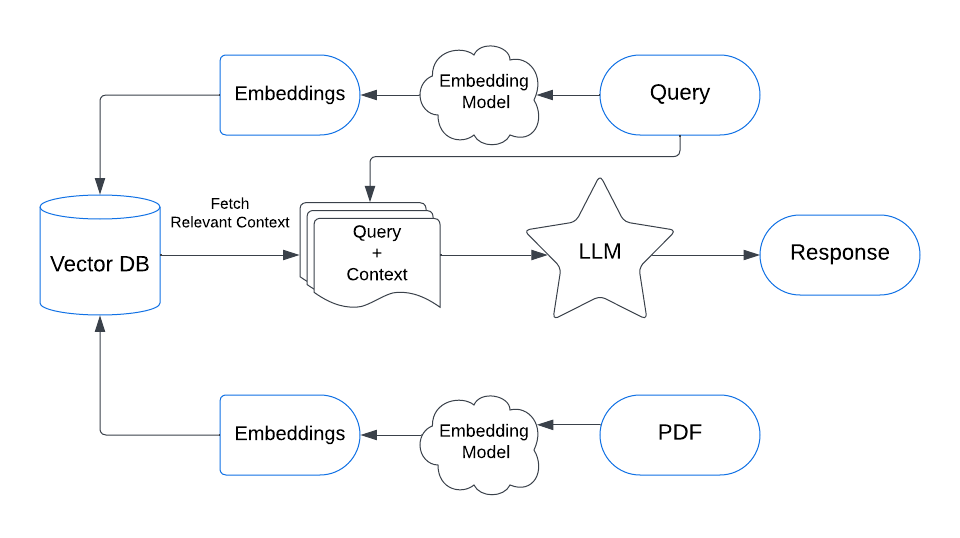 <p>
La información vendría en vez de un pdf de esta búsqueda en internet.


-------------------------------------
Para la base de datos vectorial vamos a usar FAISS que es una librería de código abierto creada por Facebook AI Research, que te permite realizar búsquedas de vectores de alta eficiencia. No requiere una cuenta o token, ya que todo se puede realizar localmente. Procedemos con su instalación y configuración.
Para preparar la información para pasarla al RAG, se pueden realizar las siguientes tareas:
- **Tokenización**: Dividir los textos en tokens (palabras o caracteres). Puedes utilizar la biblioteca nltk para tokenizar el texto.
- **Extracción de entidades, tokenización o obtención de lexemas**: Identificar palabras clave en el texto que denoten entidades como lugares, fechas o eventos.

In [6]:
! pip install faiss-cpu

In [7]:
import faiss
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Consulta al LLM usando Groq
def get_llama_response(prompt):
    response = completion(prompt)
    return response

# Función para convertir texto en embeddings usando TF-IDF como ejemplo
def generate_embeddings_from_text(texts: List[str]):
    vectorizer = TfidfVectorizer()
    embeddings = vectorizer.fit_transform(texts).toarray()
    return embeddings

# Ejemplo de uso
llama_response = get_llama_response("Describe un lugar que no debo perderme en Salamanca, España")
texts = [llama_response]

# Generar embeddings
embeddings = generate_embeddings_from_text(texts)

# Mostrar la forma/dimensión de los embeddings
print(f"Dimensión de los embeddings: {embeddings.shape}")

# Si deseas imprimir un vector específico (por ejemplo, el primero):
print(f"Primer embedding: {embeddings[0]}")

# Para ver el tamaño de cada vector (número de características):
print(f"Tamaño de cada vector: {embeddings.shape[1]}")



Dimensión de los embeddings: (1, 125)
Primer embedding: [0.02924777 0.02924777 0.02924777 0.08774331 0.02924777 0.05849554
 0.02924777 0.02924777 0.02924777 0.02924777 0.11699108 0.02924777
 0.05849554 0.02924777 0.02924777 0.05849554 0.02924777 0.02924777
 0.02924777 0.02924777 0.49721207 0.02924777 0.14623885 0.02924777
 0.05849554 0.02924777 0.02924777 0.23398215 0.02924777 0.20473438
 0.02924777 0.02924777 0.02924777 0.02924777 0.29247769 0.11699108
 0.02924777 0.02924777 0.02924777 0.02924777 0.02924777 0.02924777
 0.02924777 0.02924777 0.02924777 0.02924777 0.02924777 0.02924777
 0.02924777 0.02924777 0.05849554 0.02924777 0.02924777 0.05849554
 0.02924777 0.02924777 0.02924777 0.02924777 0.17548661 0.05849554
 0.02924777 0.02924777 0.02924777 0.02924777 0.11699108 0.17548661
 0.02924777 0.02924777 0.11699108 0.02924777 0.02924777 0.02924777
 0.05849554 0.02924777 0.02924777 0.08774331 0.02924777 0.02924777
 0.02924777 0.02924777 0.02924777 0.23398215 0.02924777 0.02924777
 0.058

Ahora que tenemos los componentes vamos a realizar el prototipo final.
El flujo sería el siguiente:
1. Busqueda de TAVILY de los puntos de interés de un lugar.
2. Obtención de urls con información valiosa.
3. Tratamiento de la información: splitter/tokenización/embeddings con FAISS.
4. Busqueda de similaridad (en verdad se podría obviar pues toda la búsqueda será pertinente).
5. Construcción del prompt con contexto los embbedings creados.
6. Obtención de los resultados con modelo Ollama con clave Groq.

In [15]:
#Si no se ha hecho antes, se carga la API_KEY
import os
from dotenv import load_dotenv

# Load .env file
load_dotenv()

api_key = os.getenv("TAVILY_API_KEY")

if not api_key:
    raise ValueError("No API key found. Please set TAVILY_API_KEY in your .env file.")

# os.environ["TAVILY_API_KEY"] = api_key
# Instanciación del retriever y consulta
from langchain_community.retrievers import TavilySearchAPIRetriever

retriever = TavilySearchAPIRetriever(k=3)
query = "dime lugares que no debo perderme en Burgos, España"
retriever.invoke(query)

[Document(metadata={'title': '20 lugares increíbles qué ver en Burgos (por una burgalesa)', 'source': 'https://viajeros30.com/2022/12/14/que-ver-y-que-hacer-en-burgos-en-un-fin-de-semana-o-mas/', 'score': 0.9927672, 'images': []}, page_content='Lugares imprescindibles que ver en Burgos. » Catedral de Burgos. » Arco y Puente de Santa María. » Paseo del Espolón. » Puente de San Pablo y estatua del Cid Campeador. » Plaza de San Juan. » Plaza de la Libertad. » Plaza Mayor. » Arco e Iglesia de San Gil.'),
 Document(metadata={'title': 'Qué ver en Burgos: 25 lugares que no debes perderte - Sitios de España', 'source': 'https://www.sitiosdeespana.es/articulo/que-ver-en-burgos-25-lugares-que-no-debes-perderte', 'score': 0.9750122, 'images': []}, page_content='Los 25 lugares imprescindibles que ver en Burgos: 1.-. Catedral de Burgos. Qué ver en Burgos - Catedral | Foto: Dreamstime.com. Marcan 800 años desde que la Catedral de Burgos fue construída. Uno de los primeros templos góticos de la penín

In [ ]:
# Instanciación del retriever y consulta
from langchain_community.retrievers import TavilySearchAPIRetriever

retriever = TavilySearchAPIRetriever(k=3)
query = "dime lugares que no debo perderme en Burgos, España"
response = retriever.invoke(query)

# Extraer URLs y el contenido de cada página
urls_and_content = [{'url': doc['metadata']['source'], 'content': doc['page_content']} for doc in response['results']]

# Verificamos las URLs y contenidos extraídos
for entry in urls_and_content:
    print(f"URL: {entry['url']}")
    print(f"Contenido (primeros 200 caracteres): {entry['content'][:200]}...")


In [20]:
# Instanciación del retriever y consulta
from langchain_community.retrievers import TavilySearchAPIRetriever

retriever = TavilySearchAPIRetriever(k=3)
query = "dime lugares que no debo perderme en Burgos, España"
response = retriever.invoke(query)

# La respuesta es una lista de Document, así que accedemos directamente a esa lista
documents = response

# Extraemos las URLs y el contenido de cada página usando la notación de puntos
urls_and_content = [{'url': doc.metadata['source'], 'content': doc.page_content} for doc in documents]

# Verificamos las URLs y contenidos extraídos
for entry in urls_and_content:
    print(f"URL: {entry['url']}")
    print(f"Contenido (primeros 200 caracteres): {entry['content'][:200]}...")


URL: https://viajeros30.com/2022/12/14/que-ver-y-que-hacer-en-burgos-en-un-fin-de-semana-o-mas/
Contenido (primeros 200 caracteres): Lugares imprescindibles que ver en Burgos. » Catedral de Burgos. » Arco y Puente de Santa María. » Paseo del Espolón. » Puente de San Pablo y estatua del Cid Campeador. » Plaza de San Juan. » Plaza de...
URL: https://www.mochileandoporelmundo.com/que-ver-y-hacer-en-burgos-y-alrededores/
Contenido (primeros 200 caracteres): Que ver y hacer en Burgos capital 1. Catedral de Burgos. Burgos es más que un solo monumento, pero es que hablamos de LA CATEDRAL (así en mayúsculas), Patrimonio de la Humanidad por la UNESCO y una de...
URL: https://www.viajeroscallejeros.com/lugares-que-ver-en-burgos/
Contenido (primeros 200 caracteres): Situada el extremo noreste de Castilla y León, en la parte norte de la península ibérica, Burgos ofrece una perfecta mezcla entre su pasado, que puedes descubrir paseando por su bonito casco histórico...


3. Tratamiento de la información.

In [21]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from sklearn.feature_extraction.text import TfidfVectorizer
import faiss
import numpy as np

# Inicializar el splitter para dividir los textos en fragmentos más pequeños
splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)

# Dividimos el contenido de cada página en fragmentos
splitted_texts = []
for entry in urls_and_content:
    splitted_texts.extend(splitter.split_text(entry['content']))

# Generamos embeddings usando TF-IDF
vectorizer = TfidfVectorizer()
embeddings = vectorizer.fit_transform(splitted_texts).toarray()

# Configuramos Faiss y almacenamos los embeddings
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(np.array(embeddings).astype(np.float32))

# Verificamos la dimensión de los embeddings
print(f"Dimensión de los embeddings: {embeddings.shape}")



Dimensión de los embeddings: (3, 126)


4. Búsqueda por similaridad (opcional)

In [22]:
# Realizar una búsqueda por similaridad (opcional)
query_embedding = vectorizer.transform(["Plaza Mayor en Salamanca"]).toarray().astype(np.float32)
D, I = index.search(query_embedding, 5)  # Busca los 5 más similares


#### 5 y 6: Construcción y ejecución del prompt con todo lo aprendido en este cuaderno.

In [23]:
# Seleccionamos algunos fragmentos relevantes (en este caso podemos usar todos)
context = "\n".join(splitted_texts[:5])  # Usamos solo los primeros 5 fragmentos como ejemplo

# Construimos el prompt para Groq-Ollama
city = "Burgos"
nPoi = 5
userPreferences = ["historia", "naturaleza"]

prompt_template = f"""
Eres un guía turístico comprometido con el medio ambiente preocupado por la gentrificación de las ciudades y el turismo masivo. 
Genera un array de {nPoi} objetos JSON, cada uno representando un punto de interés turístico diferente en {city}. 

Cada objeto debe incluir:
* nombre (string)
* descripción (string)
* coordenadas (array de dos números: latitud y longitud)

Ten en cuenta los siguientes intereses del usuario: {', '.join(userPreferences)}.
"""

# Agregamos el contexto generado
full_prompt = f"{context}\n{prompt_template}"

# Enviar el prompt a Groq-Ollama (aquí asumes que tienes la función de completion definida)
response = completion(full_prompt)
print(response)


Aquí te dejo los 5 objetos JSON que representan los puntos de interés turístico en Burgos, teniendo en cuenta los intereses del usuario en historia y naturaleza:

```
[
  {
    "nombre": "Catedral de Burgos",
    "descripción": "Patrimonio de la Humanidad por la UNESCO y una de las más espectaculares de España, la Catedral de Burgos es un símbolo de la ciudad y un lugar imprescindible para visitar.",
    "coordenadas": [42.3484, -3.7219]
  },
  {
    "nombre": "Paseo del Espolón",
    "descripción": "Un paseo con vistas impresionantes al río Arlanzón y al casco histórico de la ciudad, perfecto para disfrutar de la naturaleza y la arquitectura medieval.",
    "coordenadas": [42.3482, -3.7214]
  },
  {
    "nombre": "Arco y Puente de Santa María",
    "descripción": "Un lugar emblemático de la ciudad, donde se cruza el río Arlanzón y se une el pasado y el presente.",
    "coordenadas": [42.3478, -3.7222]
  },
  {
    "nombre": "Puente de San Pablo y estatua del Cid Campeador",
    "descr

## Conclusiones al prototipo completo
Se han visto diferentes técnicas de prompting y se ha elaborado una solución compleja que permite obtener resultados a través de la recuperación de información desde embeddings.

Después de varias pruebas con este cuaderno de Jupyter, se observa que los resultados obtenidos suelen dirigirse principalmente hacia los lugares más turísticos de la ciudad. Esto podría deberse a la manera en que se consulta la información en Tavily, donde no se consideran explícitamente factores como la gentrificación o la masificación turística. Sin embargo, ajustando los prompts y experimentando con diferentes enfoques, es posible obtener sugerencias para lugares menos conocidos. Lograr el equilibrio adecuado entre estos factores sería clave para ofrecer rutas más sostenibles y menos saturadas.

El proceso de experimentación en este cuaderno resulta ágil gracias a la velocidad con la que el modelo de Groq-Ollama genera respuestas. Esto permite obtener resultados óptimos rápidamente, lo que hace que el proceso de ajuste y refinamiento sea fluido y eficiente.

En general, un modelo bien entrenado tiene suficiente conocimiento para ofrecer resultados de calidad sin necesidad de complicar demasiado el proceso utilizando técnicas como RAG. Sin embargo, para ciertos casos, como la búsqueda de "los últimos sitios de moda en Burgos", Tavily puede proporcionar una base de datos actualizada que complemente el conocimiento del modelo y permita obtener respuestas más recientes.

La construcción de este cuaderno ha sido en paralelo con mi proceso de aprendizaje y ha sido útil para explorar distintas técnicas de manejo de modelos de lenguaje a gran escala (LLM) y componentes asociados, como bases de datos vectoriales y diferentes tipos de modelos. Las técnicas aprendidas son fácilmente extrapolables a otros dominios del conocimiento lo que permitiría a cualquier aplicativo obtener datos de los que nutrirse a través de modelos LLMs.


Para una solución más visual y accesible, se recomienda probar el prototipo en LangFlow. 
- [Eco CityTours - Langflow project.json](Eco%20City%20Tours%20-%20Langflow%20project.json)
- [Langflow_explanation.md](./Langflow_explanation.md)
Mientras que Jupyter ofrece mayor flexibilidad a la hora de elegir y combinar herramientas, LangFlow presenta un gran potencial gracias a su capacidad para construir APIs que pueden integrarse fácilmente en aplicaciones. Esta capacidad es especialmente valiosa en un contexto donde la evolución de los modelos LLM y herramientas como LangFlow es tan rápida que apenas existen referencias o tutoriales actuales en la red.

Si estás interesado en este fascinante mundo de los LLM's y has llegado al final de este cuaderno y tienes dudas puedes contactar conmigo en: fps1001@alu.ubu.es 


